<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Numpy and the Central Limit Theorem

Week 1 | Lesson 4.1

---

In this lesson we'll be looking at numpy data structures and functions, and then exploring the Central Limit Theorem.

---

### Load useful packages

We are loading a few packages here.

`csv` and `seaborn` you are not too familiar with yet, if at all. `seaborn` is a plotting package that we will be using a lot througout this class. We will cover it in much more detail as time goes on. For now we are loading and aliasing it as `sns`.

The `.csv` package does what we have been doing manually thus far. We will use `pandas` to do this later, but its another example of how to load csv data. Basic usage looks like:

```python
import csv
with open('some.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        print row
```

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'


---

### 1. Load in the highest paid athletes dataset

The path to this dataset is wherever you copied it over to. You'll see my path below. If you use an absolute path you'll have less trouble with the fact that it is relative to where you started the jupyter notebook in the terminal.

In [2]:
path_to_athletes_csv = '/Users/VanessaG/Desktop/DSI-SF-2-vnessified/datasets/highest_paid_athletes/Athletes.csv'

athletes = []
with open(path_to_athletes_csv, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        athletes.append(row)

In [3]:
athletes[0:2]

[['Rank',
  'Name',
  'Sport',
  'Total Pay',
  'Salary/Winnings',
  'Endorsements',
  'Nation',
  'Gender',
  'Year of birth',
  'Birth Date',
  'Place of Birth',
  'Height (cm)',
  'Wikipedia Page',
  'dbpedia Page',
  'Image',
  'Description'],
 ['55',
  'Aaron Rodgers',
  'Football',
  '$22,000,000',
  '$14,500,000',
  '$7,500,000',
  'United States',
  'Male',
  '1983',
  '2/12/1983',
  'Chico, California, United States',
  '188',
  'http://en.wikipedia.org/wiki/Aaron_Rodgers',
  'dbpedia.org/resource/Aaron_Rodgers',
  'http://commons.wikimedia.org/wiki/Special:FilePath/Aaron_Rodgers_2008_(cropped).jpg?width=300',
  'Aaron Charles Rodgers (born December 2, 1983) is an American football quarterback for the Green Bay Packers of the National Football League (NFL). Rodgers played college football for the University of California, Berkeley, where he set several career passing records, including lowest single-season and career interception rates. He was selected in the first round (24th

---

### 2. Put the data in a dictionary (rather than list) format

We've again stored the data in a list of lists, where sublists are rows, and items of those sublists are column cells within rows.

Another way to store data, which is more consistent with pandas, is in dictionary format, where the column headers are keys in a dictionary, and the columns themselves are the values associated with those keys.

Convert the data to this dictionary format, keeping only the columns:

```python
['Rank','Name','Sport','Total Pay','Salary/Winnings','Endorsements','Nation','Gender','Year of birth', 'Height (cm)']
```

In [4]:
wanted_cols = ['Rank','Name','Sport','Total Pay','Salary/Winnings','Endorsements','Nation','Gender',
               'Year of birth', 'Height (cm)']

ath = {k:[] for k in wanted_cols}

In [5]:
header = athletes[0]
data = athletes[1:]

for index, column_name in enumerate(header):
    
    if column_name in wanted_cols:
        print column_name, 'column index:', index

        for row in data:
            ath[column_name].append(row[index])
    

Rank column index: 0
Name column index: 1
Sport column index: 2
Total Pay column index: 3
Salary/Winnings column index: 4
Endorsements column index: 5
Nation column index: 6
Gender column index: 7
Year of birth column index: 8
Height (cm) column index: 11


In [6]:
{k:v[0:4] for k,v in ath.items()}

{'Endorsements': ['$7,500,000', '$9,000,000', '$400,000', '$300,000'],
 'Gender': ['Male', 'Male', 'Male', 'Male'],
 'Height (cm)': ['188', '183', '188', '190'],
 'Name': ['Aaron Rodgers', 'Adam Scott', 'Adrian Gonzalez', 'Alex Rodriguez'],
 'Nation': ['United States', 'Australia', 'United States', 'United States'],
 'Rank': ['55', '95', '60', '48'],
 'Salary/Winnings': ['$14,500,000',
  '$8,700,000',
  '$21,100,000',
  '$22,600,000'],
 'Sport': ['Football', 'Golf', 'Baseball', 'Baseball'],
 'Total Pay': ['$22,000,000', '$17,700,000', '$21,500,000', '$22,900,000'],
 'Year of birth': ['1983', '1980', '1982', '1975']}

Convert the numeric columns into float values. For the salary columns, you will need to remove the comma and dollar sign characters to properly convert to float.

In [7]:
for column in ['Endorsements', 'Height (cm)', 'Rank', 'Salary/Winnings', 'Total Pay', 'Year of birth']:
    string_row = ath[column]
    float_row = [float(s.replace('$', '').replace(',','')) for s in string_row]
    ath[column] = float_row

In [8]:
endor = ath['Endorsements']
endor[0:5] 

[7500000.0, 9000000.0, 400000.0, 300000.0, 50000.0]

In [9]:
# .replace()

# .float()

# {k:v[0:4] for k,v in ath.items()}.replace('$', )

---

### 3. Select numeric columns and convert to numpy arrays

Pull out the three different salary columns and the height column into their own numpy arrays.

In [10]:
#np.array(row) <-- converts to a numpy array

total_pay = np.array(ath['Total Pay'])
salary = np.array(ath['Salary/Winnings'])
endorse = np.array(ath['Endorsements'])

height = np.array(ath['Height (cm)'])

In [11]:
print type(salary)

<type 'numpy.ndarray'>


In [12]:
salary[0:10]

array([ 14500000.,   8700000.,  21100000.,  22600000.,  18000000.,
        21700000.,  20300000.,  16500000.,  18400000.,  16800000.])

---

### 4. Plot the distributions of the numeric columns

Use the distribution plotter function below to plot out the distributions for the four variables assigned above.

In [13]:
#normalized distrubution 
# def distribution_plotter(column, data):
#     sns.set(rc={"figure.figsize": (10, 7)})
#     sns.set_style('white')
#     dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
#     dist.set_title('Distribution of ' + column + '\n', fontsize=16)

In [14]:
#change kde somewhere for unnormalized dist

def distribution_plotter(column, data):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
    dist = sns.distplot(data, kde=False, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist.set_title('Distribution of ' + column + '\n', fontsize=16)

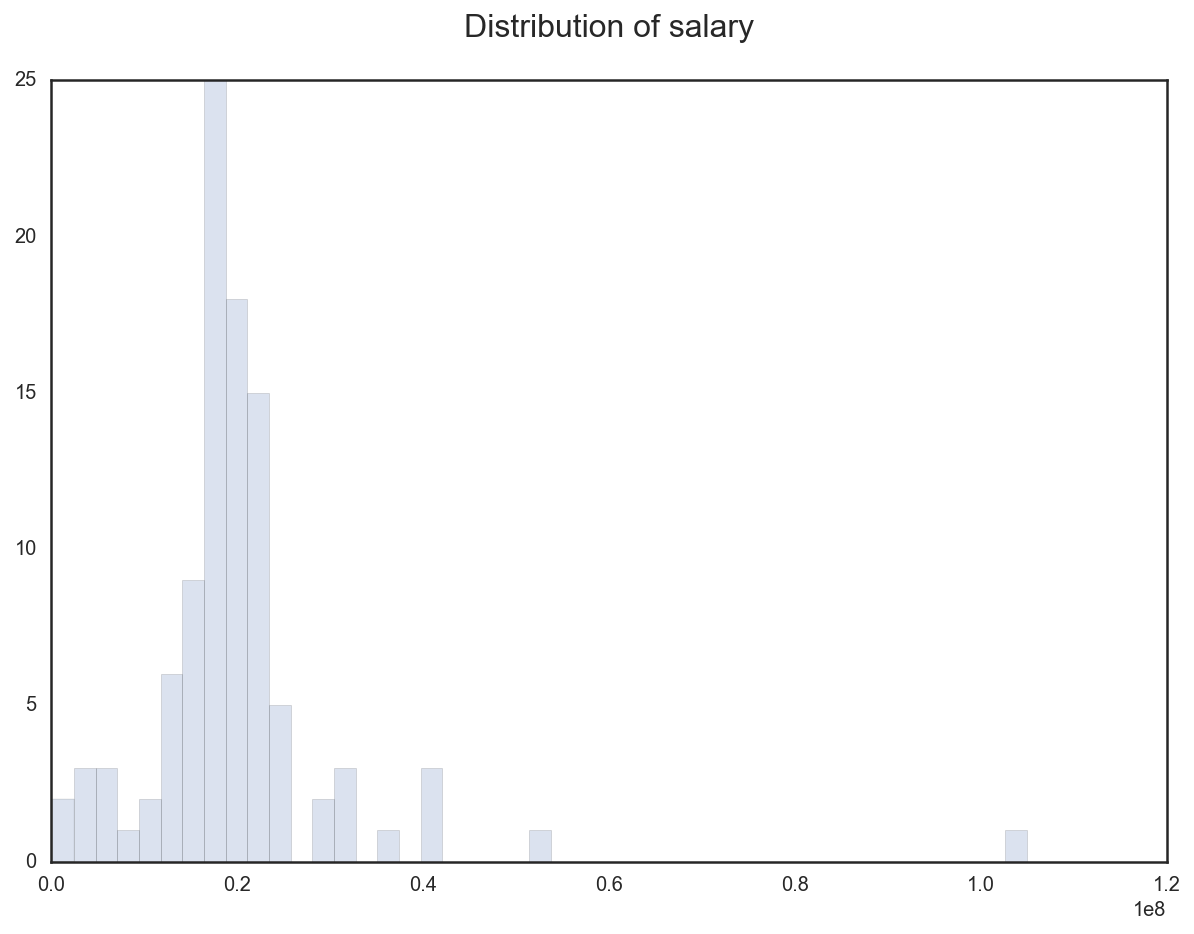

In [15]:
#sample distribution --> not true/population distribution
distribution_plotter('salary', salary)

---

### 5. Basic linear algebra/matrix operations in numpy

Overview of linear algebra/matrix operations in numpy.

Numpy has an `np.matrix` and an `np.array`, what gives? Which should I use?

Use `np.array`. This is the standard representation for matrices in numpy, and this is what we will use throughout the rest of the course. If you are interested you can read more about the differences online.

#### 5.1 Indexing and slicing

Subset the first 5 elements of total pay and height into new variables. Slicing (on 1D arrays) is the same as with python lists.

In [16]:
salary_sub = salary[0:5]
pay_sub = total_pay[0:5]
pay_sub

array([ 22000000.,  17700000.,  21500000.,  22900000.,  18050000.])

#### 5.2 Arithmetic operations

Numpy allows easy "vectorized" arithmetic operations on arrays and matrices. Try:

1. Dividing an array by a number with `/`
2. Multiplying an array with `*`
3. Adding and subtracting from an array with `+` and `-`

In [17]:
pay_sub / 1000000

array([ 22.  ,  17.7 ,  21.5 ,  22.9 ,  18.05])

In [18]:
pay_sub * 10

array([  2.20000000e+08,   1.77000000e+08,   2.15000000e+08,
         2.29000000e+08,   1.80500000e+08])

In [19]:
pay_sub = pay_sub /1000000
salary_sub = salary_sub /1000000

You can also do these operations element-wise (as if using the `zip()` function) by using two arrays of the same length.

Try dividing the 5-element total pay array by the 5-element height array.

In [20]:
salary_sub + pay_sub

array([ 36.5 ,  26.4 ,  42.6 ,  45.5 ,  36.05])

We can also do the dot product of the arrays, which is for 1D-arrays the sum of the element-wise values multiplied together.

Try it with `np.dot()`.

In [22]:
np.dot(salary_sub, pay_sub)

1769.0800000000002

#### 5.3 Matrices vs. arrays 

You can make matrices by using `np.array()` on lists of lists (or numpy arrays). Combine the small height and pay arrays together into a matrix.

In [25]:
mat = np.array([[1,2], [3,4],[5,6]])
mat

array([[1, 2],
       [3, 4],
       [5, 6]])

In [26]:
mat.shape

(3, 2)

Transposition of a matrix is easy: just append a `.T` to the end of the matrix.

You can create empty matrices of ones or zeros in numpy like so:

```python
# dimensions of the matrix (rows, cols, etc.):
matrix_shape = (3,3)
ones_mat = np.ones(matrix_shape)
zeros_mat = np.zeros(matrix_shape)
```

Try it out with a matrix shape of your choice.

In [28]:
np.ones((3,3))
np.zeros((3,4))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

#### 5.4 Slicing and indexing for matrices

Numpy indexing and slicing of arrays/matrices greater than one dimension is easy once you get used to it. It is essentially the same as one dimensional selection or slicing, but you have an index or range for each dimension separated by commas in the brackets.

For example, say I have matrix A:
```python
a = np.array([[1,2],[3,4],[5,6]])
array([[1, 2],
       [3, 4],
       [5, 6]])
```

Get the first row:
```python
a[0,:]
array([1, 2])
```

Get the second column:
```python
a[:,1]
array([2, 4, 6])
```

Get the cell at row 3, column 1:
```python
a[2,0]
5
```

Try it out yourself.

In [31]:
mat[1,0:2]

array([3, 4])

#### 5.5 The concept of "masking"

Selecting and operating on arrays can also be done through a process called **masking**, which we will be using very frequently on datasets.

Numpy arrays can be indexed and subset with conditional statements in the brackets. These conditional statements are converted to True/False boolean arrays, which are used to select elements of an array (or not, aka "mask" the parts you don't want.)

For example, all elements from `a` greater than 3:
```python
a[a>3]
array([4, 5, 6])
```

or columns and rows from `a` where the first column of `a` is less than 5:
```python
a[a[:,0] < 5, :]
array([[1, 2],
       [3, 4]])
```

Make a matrix with the first column as players' heights, and the second column as their total pay. Subset using this masking logic to find all of the heights with a total pay above 10 million dollars.

In [35]:
print mat[0,:]
mat[:, mat[0,:] == 2]

[1 2]


array([[2],
       [4],
       [6]])

In [36]:
import pandas as pd

In [53]:
athletes = pd.read_csv(path_to_athletes_csv)
athletes.head

# athletes[athletes['Sport'] == 'Golf']

golfletes = athletes[(athletes['Sport'] == 'Golf') & (athletes['Height (cm)'] < 180)]
golfletes.head()

,Rank,Name,Sport,Total Pay,Salary/Winnings,Endorsements,Nation,Gender,Year of birth,Birth Date,Place of Birth,Height (cm),Wikipedia Page,dbpedia Page,Image,Description
82,35,Rory McIlroy,Golf,"$24,300,000","$4,300,000","$20,000,000",Northern Ireland,Male,1989,4/05/1989,"County Down, Northern Ireland, United Kingdom",175,http://en.wikipedia.org/wiki/Rory_McIlroy,dbpedia.org/resource/Rory_McIlroy,http://commons.wikimedia.org/wiki/Special:File...,"Rory McIlroy, MBE (born 4 May 1989) is a North..."


Plot the distribution of heights with pay over 10,000,000.

In [54]:
# pay is sport is football vs basketball

---

#### 5.6 Review

These are the essential kinds of operations we'll be using. The main takeaway is to get used to these kind of **vectorized** operations: doing arithmetic operations on every element of an array, either with single values or element-wise with another array.  **Masking** operations will become extremely important tools as we move into pandas data manipulation.

We'll be doing this on data all the time using pandas. For example, adding a year to everyone's age, or multiplying the age column by the height column for each person (element-wise).

For more detailed information on the capabilities of numpy operations, see:

http://www.python-course.eu/matrix_arithmetic.php

https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html

---

### 6. The Central Limit Theorem and the Law of Large Numbers

The Central Limit Theorem (CLT) is one of the most important, if not **THE** most important theorems in statistics. While this lecture does not cover the implications so much as the theorem itself, know that this is the basis of Frequentist statistics.

#### 6.1 The Law of Large Numbers

But first... [The Law of Large Numbers (LLN)](https://en.wikipedia.org/wiki/Law_of_large_numbers)

The LLN is (luckily) fairly straightforward, and a precursor to understanding the CLT. My simplified definition is:

> Performing the same experiment a large number of times and taking the average of the results will result in a convergence to the true expected value of the experiment.

Imagine, for example, you were to roll a die two times. In this case, the die is weighted, but you don't know how it is weighted. You get a 1 and a 5.

From just these two experiments, our average is 3.0. If we were to stop here, we would assume that the expected value of the die is 3.0, and so slightly biased towards smaller numbers...

#### 6.2 Numpy's `random` module and exploration of the LLN

Before continuing, let's introduce a very important section of `numpy`: the `np.random` module.

It is _very_ much worth reading over the documentation for the different functions available in `numpy.random`. Randomness is intrinsic to statistical theory, and, especially in a statistical course, we will be using it often.

That's not to say you _won't_ be using it in practice. I guarantee that you will be consistently returning to these functions in your future jobs.

For this example of the LLN, we will be using `np.random.choice()`, a function that samples from a provided array or list of elements. The arguments are:

    a : the array from which to choose elements
    size : the number of elements to draw
    replace : whether to sample with replacement
    p : a vector of probabilities equal to the number of elements in a which sums to one, specifying the probability of drawing the elements
    
Below are the _true_ probabilities of drawing each number on the die, or in other words the true weighting of the die:

In [56]:
a = np.array([1,7])/8.
a

array([ 0.125,  0.875])

In [59]:
die = [1,2,3,4,5,6]

weight = np.array([13.5, 1.2, 3.3, 2.2, 3.9, 12.8])
weight = weight/np.sum(weight)

Explain what each step in defining the `weight` vector means. What is the difference in describing the `weight` vector before and after dividing it by its sum to get the probabilities for `np.random.choice()`?

Now we will "roll the die" different numbers of times. Use `np.random.choice` with the `die` and `weight` vector to assign different die roll "experiments":

    1. 2 die roles
    2. 5 die roles
    3. 10 die rolls
    4. 100 die rolls
    5. 10000 die rolls
    
**Make sure to set replace=True !! Just because you rolled a 6, for example, doesn't mean you can't roll a 6 again.** This is the difference between rolling a die and say choosing items out of a bag without putting them back in.

In [63]:
roll2 = np.random.choice(die, size=2, replace=True, p=weight)
roll5 = np.random.choice(die, size=5, replace=True, p=weight)
roll10 = np.random.choice(die, size=10, replace=True, p=weight)
roll100 = np.random.choice(die, size=100, replace=True, p=weight)
roll1000 = np.random.choice(die, size=1000, replace=True, p=weight)

#### 6.3 Visualization of the LLN

Below I have defined a histogram plotting function. Use the function to plot the histograms of each of the die roll experiments.

You can look up the seaborn function `distplot` on the [seaborn API documentation](https://stanford.edu/~mwaskom/software/seaborn/api.html) to see how the histogram plot function works. Again, we'll be going into seaborn in depth very soon, but getting accustomed to reading documentation now is essential.

**DON'T WORRY ABOUT UNDERSTANDING THE PLOTTING CODE AT THIS POINT!** Matplotlib is very confusing at first. We will spend a lot of time on this.

In [64]:
def histogram_plotter(title, data):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
    dist = sns.distplot(data, kde=False, bins=6)
    
    dist.axvline(np.mean(data), lw=5, c='darkred', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data))
    title = 'Distribution of ' + title + '; average = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)

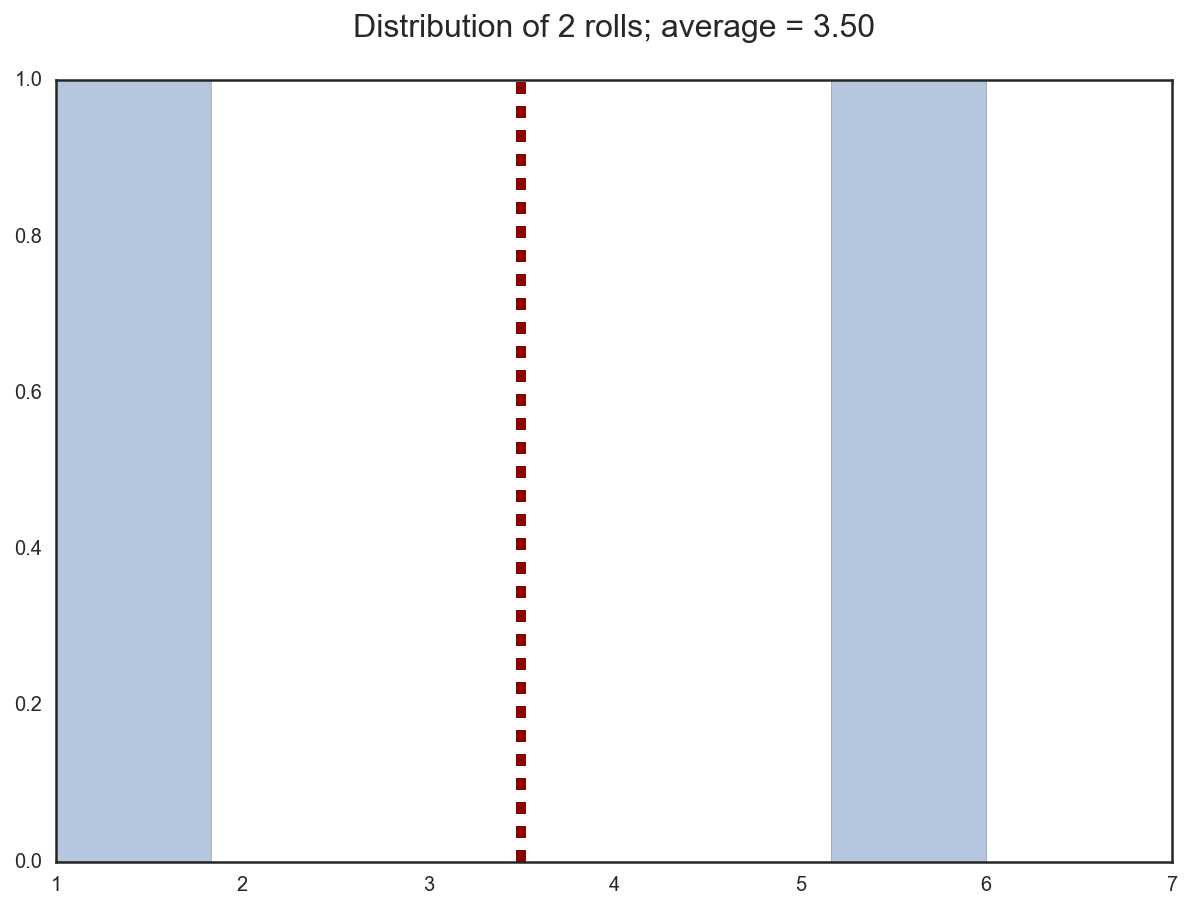

In [65]:
histogram_plotter('2 rolls', roll2)

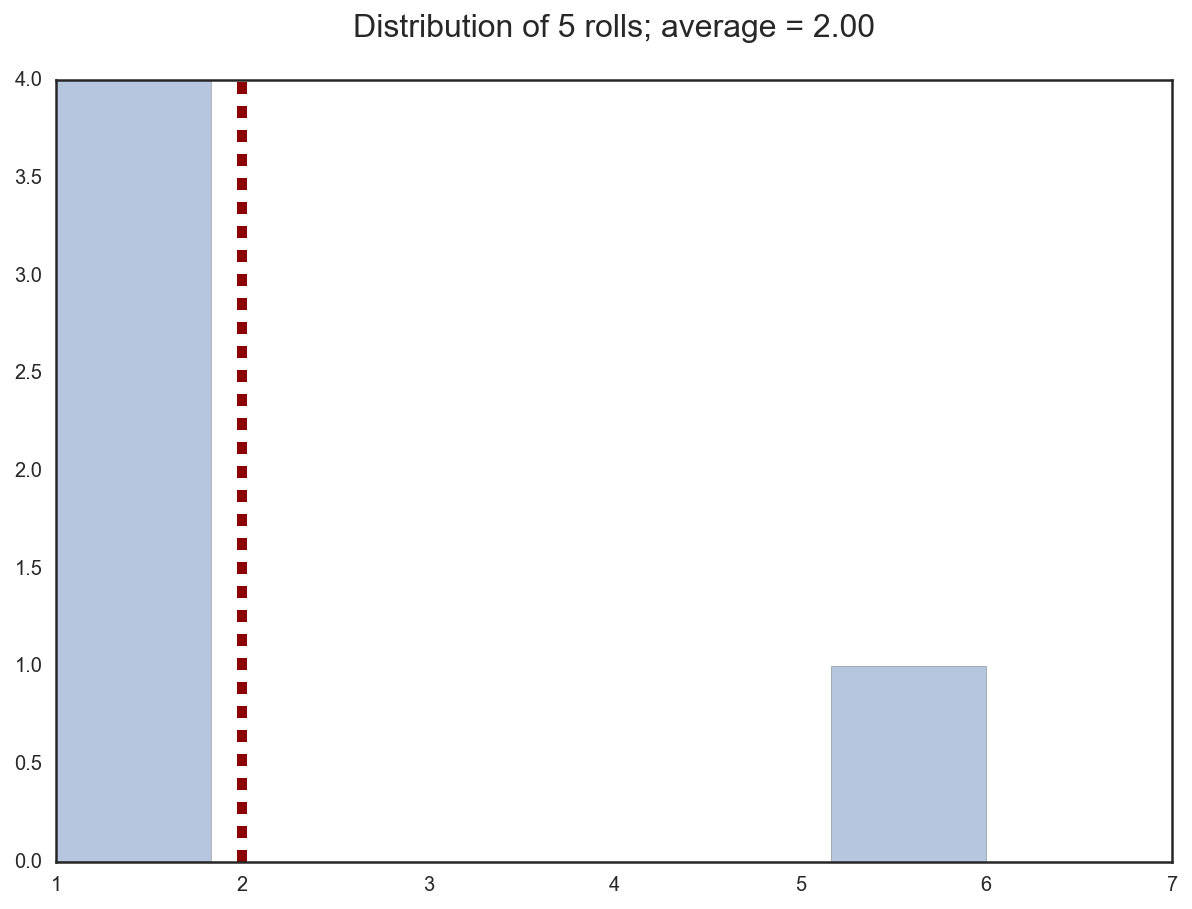

In [66]:
histogram_plotter('5 rolls', roll5)

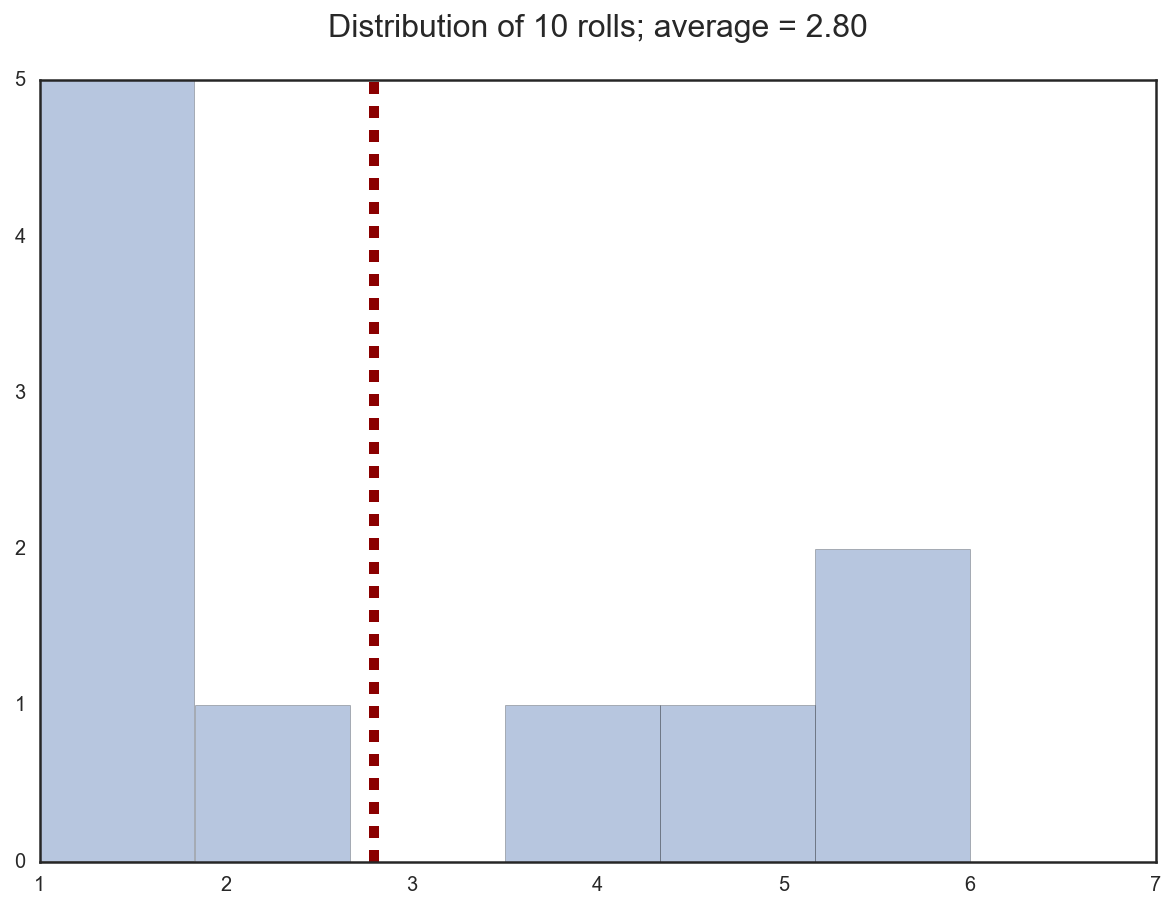

In [67]:
histogram_plotter('10 rolls', roll10)

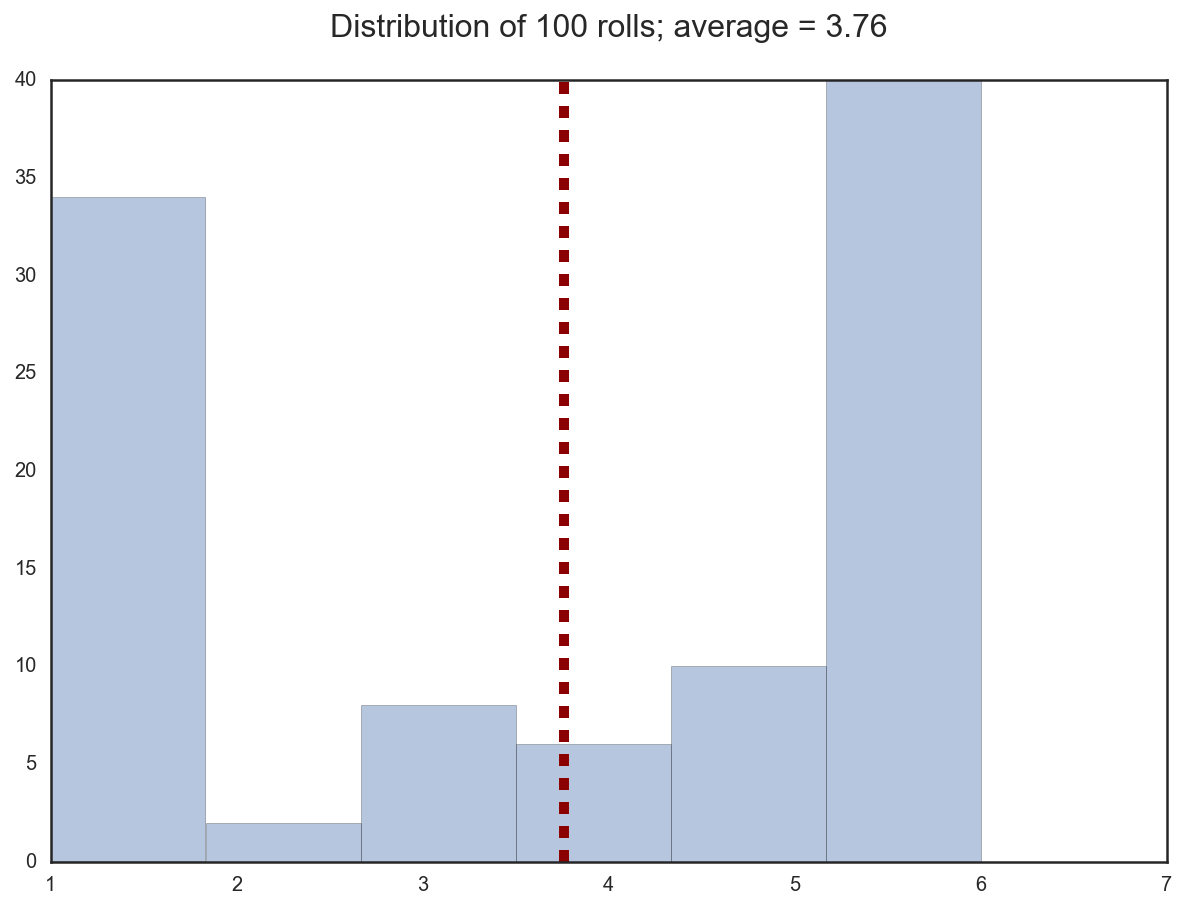

In [69]:
histogram_plotter('100 rolls', roll100)

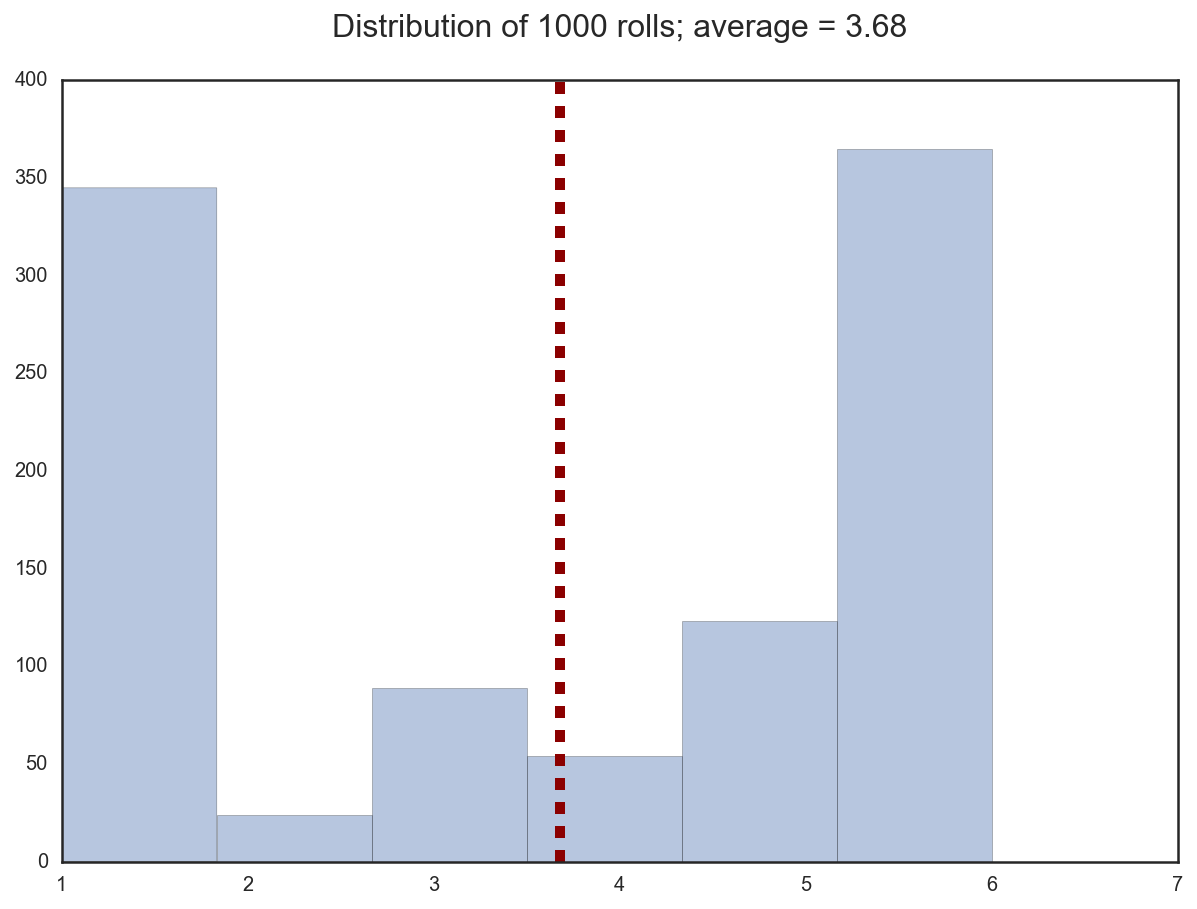

In [77]:
#good example of why it's so important to plot data - the average is close to 3.5 which it would be for a regularly weighted die
histogram_plotter('1000 rolls', roll1000)

In [76]:
np.dot(weight, die)

3.5474254742547426

In [73]:
np.mean(roll1000)

3.681

In [74]:
np.mean(roll100)

3.7599999999999998

Calculate the **true expected value**. 

Hint: you can do this with the element-wise numpy array operations we covered earlier!

In [75]:
np.sum(weight*die)

3.5474254742547426

The expected value is very close to the expected value of an evenly weighted die, but 1 and 6 are rolled much more often than the other numbers. This is an example of a **bi-modal** distribution.

---

#### 6.4 On to the CLT

So, how does the LLN relate to the CLT? Below is the high-level definition of [the CLT, (which is lifted from Wikipedia, of course)](https://en.wikipedia.org/wiki/Central_limit_theorem):

> In probability theory, the central limit theorem (CLT) states that, given certain conditions, the arithmetic mean of a sufficiently large number of iterates of independent random variables, each with a well-defined (finite) expected value and finite variance, will be approximately normally distributed, regardless of the underlying distribution.

**WTF does this mean?**

It means that if you compute a mean of samples from ANY _true population distribution_, that mean will be normally distributed with 

**mean = mean of true population mean** and 

**standard deviation = standard error of the population mean**

where a **standard error = (standard deviation) / sqrt(N)**

check out:

http://blog.vctr.me/posts/central-limit-theorem.html

and http://www.usablestats.com/lessons/central_limit

for a couple of gentle explanations.

#### 6.5 Exploring the CLT in code - back to the dice

Let's say now we have two different conditions:

1. Rolling the die 5 times _in batches_ 20 different times. Each time we roll the die 5 times, we take the mean of the batch and append it to a list.
2. Rolling the die 5 times _in batches_ 300 different times. Each time we roll the die 5 times, we take the mean of the batch and append it to a list.
3. Rolling the die 100 times _in batches_ 300 different times. Each time we roll the die 100 times, we take the mean of the batch and append it to a list.

Code out these different scenarios. You should have 3 different lists with the means of the batch die-rolling.

#### 6.6 Plot the realization of the CLT

Now, plot out these different mean distributions using the histogram plotting function.

Also print out the standard deviation of the sample means as well as the standard deviation of the sample means **multipled by the square root of the sample means.** 

Multiplying by the square root of the sample means is necessary is a correction. What does this correction do?